In [83]:
import os
import cv2
import time
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

## load data

In [84]:
path= "./data"
train_file_0= os.listdir(path+ "/train/NORMAL")
train_file_1= os.listdir(path+ "/train/PNEUMONIA")
test_file_0= os.listdir(path+ "/test/NORMAL")
test_file_1= os.listdir(path+ "/test/PNEUMONIA")

## set train data

In [85]:
X_full= 0
check= False

for file in train_file_0:
    img_in= cv2.imread(path+ "/train/NORMAL/"+ file, cv2.IMREAD_GRAYSCALE)
    img_res= cv2.resize(img_in, dsize= (100, 100), interpolation= cv2.INTER_LINEAR)
    img_round= img_res/255
    img_resh= img_round.reshape((100, 100, 1))
    img= img_resh.reshape((1, )+ img_resh.shape)
    
    if(check== False):
        X_full= img
        check= True
    else:
        X_full= np.vstack((X_full, img))

for file in train_file_1:
    img_in= cv2.imread(path+ "/train/PNEUMONIA/"+ file, cv2.IMREAD_GRAYSCALE)
    img_res= cv2.resize(img_in, dsize= (100, 100), interpolation= cv2.INTER_LINEAR)
    img_round= img_res/255
    img_resh= img_round.reshape((100, 100, 1))
    img= img_resh.reshape((1, )+ img_resh.shape)
    X_full= np.vstack((X_full, img))

In [89]:
y_full= np.array([0]* len(train_file_0))
y_full_1= np.array([1]* len(train_file_1))
y_full= np.append(y_full, y_full_1)

In [90]:
X_test, y_train= shuffle(X_full, y_full, random_state= 42)

## separate train, val data

In [91]:
X_train, X_val, y_train, y_val= train_test_split(X_full, y_full, test_size= 0.25)

## save data

In [92]:
np.save("./dataset/X_train", X_train)
np.save("./dataset/y_train", y_train)
np.save("./dataset/X_val", X_val)
np.save("./dataset/y_val", y_val)

In [113]:
X_test= 0
check= False

for file in test_file_0:
    img_in= cv2.imread(path+ "/test/NORMAL/"+ file, cv2.IMREAD_GRAYSCALE)
    img_res= cv2.resize(img_in, dsize= (100, 100), interpolation= cv2.INTER_LINEAR)
    img_round= img_res/255
    img_resh= img_round.reshape((100, 100, 1))
    img= img_resh.reshape((1, )+ img_resh.shape)
    
    if(check== False):
        X_test= img
        check= True
    else:
        X_test= np.vstack((X_test, img))

for file in test_file_1:
    img_in= cv2.imread(path+ "/test/PNEUMONIA/"+ file, cv2.IMREAD_GRAYSCALE)
    img_res= cv2.resize(img_in, dsize= (100, 100), interpolation= cv2.INTER_LINEAR)
    img_round= img_res/255
    img_resh= img_round.reshape((100, 100, 1))
    img= img_resh.reshape((1, )+ img_resh.shape)
    X_test= np.vstack((X_test, img))

In [114]:
y_test= np.array([0]* len(test_file_0))
y_test_1= np.array([1]* len(test_file_1))
y_test= np.append(y_test, y_test_1)

In [115]:
X_test, y_test= shuffle(X_test, y_test, random_state= 42)

## save data

In [116]:
np.save("./dataset/X_test", X_test)
np.save("./dataset/y_test", y_test)

## load data

In [117]:
X_train= np.load("./dataset/X_train.npy")
y_train= np.load("./dataset/y_train.npy")
X_val= np.load("./dataset/X_val.npy")
y_val= np.load("./dataset/y_val.npy")
X_test= np.load("./dataset/X_test.npy")
y_test= np.load("./dataset/y_test.npy")

## check shape

In [118]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(3912, 100, 100, 1)
(3912,)
(1304, 100, 100, 1)
(1304,)
(624, 100, 100, 1)
(624,)


## build model

In [99]:
model= keras.models.Sequential()

In [100]:
model.add(keras.layers.Conv2D(64, 10, activation= "relu", padding= "same", input_shape= [100, 100, 1]))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(128, 4, activation= "relu", padding= "same"))
model.add(keras.layers.Conv2D(128, 4, activation= "relu", padding= "same")) 
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(256, 4, activation= "relu", padding= "same"))
model.add(keras.layers.Conv2D(256, 4, activation= "relu", padding= "same"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(32, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation= "softmax"))

In [101]:
model.compile(loss= "sparse_categorical_crossentropy", optimizer= "sgd", metrics= ["accuracy"])

In [102]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 100, 100, 64)      6464      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 50, 50, 128)       131200    
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 50, 50, 128)       262272    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 25, 25, 256)       524544    
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 25, 25, 256)      

In [103]:
start_time= time.time()
history= model.fit(X_train, y_train, epochs= 30, validation_data= (X_val, y_val))
end_time= time.time()
print("time: ", end_time- start_time)

Epoch 1/30
123/123 [==============================] - 160s 1s/step - loss: 0.6094 - accuracy: 0.7242 - val_loss: 0.5642 - val_accuracy: 0.7623
Epoch 2/30
123/123 [==============================] - 165s 1s/step - loss: 0.5785 - accuracy: 0.7357 - val_loss: 0.5049 - val_accuracy: 0.7623
Epoch 3/30
123/123 [==============================] - 167s 1s/step - loss: 0.5089 - accuracy: 0.7390 - val_loss: 0.3629 - val_accuracy: 0.7623
Epoch 4/30
123/123 [==============================] - 166s 1s/step - loss: 0.4430 - accuracy: 0.7679 - val_loss: 0.3228 - val_accuracy: 0.9371
Epoch 5/30
123/123 [==============================] - 169s 1s/step - loss: 0.3789 - accuracy: 0.8188 - val_loss: 0.4759 - val_accuracy: 0.7684
Epoch 6/30
123/123 [==============================] - 168s 1s/step - loss: 0.3309 - accuracy: 0.8563 - val_loss: 0.1613 - val_accuracy: 0.9471
Epoch 7/30
123/123 [==============================] - 167s 1s/step - loss: 0.2811 - accuracy: 0.8745 - val_loss: 0.2612 - val_accuracy: 0.9241

## save model

In [104]:
model.save("./model/learning_model")

INFO:tensorflow:Assets written to: ./model/learning_model\assets


## learning model

In [105]:
model= load_model("./model/learning_model")

## check loss and accuracy

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

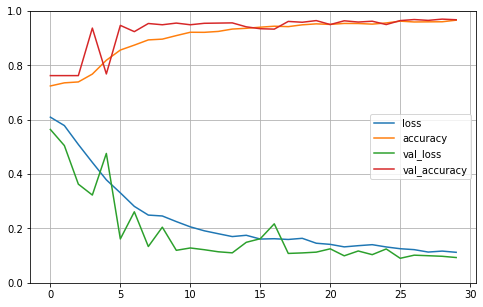

In [119]:
pd.DataFrame(history.history).plot(figsize= (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## check with test data

In [120]:
y_pred= model.predict_classes(X_test)
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [121]:
y_test

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,

## check accuracy

In [122]:
accuracy= 0

for i in range(len(y_test)):
    if(y_test[i]== y_pred[i]):
        accuracy+= 1
        
print("accuracy: ", accuracy/len(y_test))

accuracy:  0.7692307692307693
